# Mutual Fund Calculator <br>
In this notebook, we will learn how to calculate the potential returns on a mutual fund. <br>

In [1]:
# Importing the libraries we will use
import pandas_datareader as pdr
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Find the historical performance of the Fund <br>
First, we need to find the historical performance of the fund. To get historical data, we will use yahoo finance. We will use *Average Rate of Return* and *Rolling Returns*

First, lets import the data for a mutal fund. <br>
We will only be working with closing values

In [2]:
ticker = 'VFIAX'
fund = pdr.get_data_yahoo(ticker, 
                          start=datetime.datetime(2000, 1, 1), 
                          end=datetime.date.today())
fund.reset_index(inplace=True)

In [3]:
# Using only the close information of the fund.
# Also, converting the Date column to type(Date) in pandas
fund_close = fund[['Date', 'Close']]
fund_close['Date'] = pd.to_datetime(fund_close['Date'], format='%Y-%m-%d')
# Adding a column of year to better separate the data
fund_close['Year'] = pd.DatetimeIndex(fund_close['Date']).year
# Grouping the data by years
years = fund_close.groupby('Year')
list_years = list(years.groups.keys())

C:\Users\cerda\AppData\Local\Temp/ipykernel_9224/544477792.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fund_close['Date'] = pd.to_datetime(fund_close['Date'], format='%Y-%m-%d')
C:\Users\cerda\AppData\Local\Temp/ipykernel_9224/544477792.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fund_close['Year'] = pd.DatetimeIndex(fund_close['Date']).year


### Calculating the Average Rate of Return <br>
Average Rare of return is shown typically as a percentage. One thing to note, ARR may not show how consistenly an investment produces the stated percentage. Since we are using an average, it may hide numerous outliers in the data.

In [4]:
# Yearly rate of return since beginning
yrr = []
for x in list_years:
    a = years.get_group(x).iloc[0]['Close']
    b = years.get_group(x).iloc[-1]['Close']
    y = ((b - a) / a) * 100
    yrr.append(y)

#Average Rate of Return
arr = sum(yrr) / len(yrr)


#### Plotting annual rate of returns


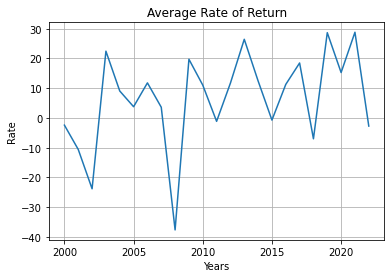

In [5]:
fig = plt.figure()
plt.plot(list_years, yrr)
plt.grid(True)
plt.title('Average Rate of Return')
plt.xlabel('Years')
plt.ylabel('Rate')
plt.show()

### Calculating Rolling Return <br>
Rolling returns (rolling period returns), are annualized average returns for a period of time wnding with the listed year. Rolling returns are useful for examining the behavior of returns for holdid periods, similar to those actually experinced by inverstors. <br>
source: [Investopedia](https://www.investopedia.com/terms/r/rollingreturns.asp)

In [6]:
# More information on arr
arr_1 = round(yrr[-1], 2)
arr_3 = round(sum(yrr[-3:])/len(yrr[-3:]), 2)
arr_5 = round(sum(yrr[-5:])/len(yrr[-5:]), 2)
arr_10 = round(sum(yrr[-10:])/len(yrr[-10:]), 2)
data = [{'Ticker': ticker ,'1-Year': arr_1, '3-Year': arr_3, '5-Year': arr_5, '10-Year': arr_10}]
df1 = pd.DataFrame(data)
df1


,Ticker,1-Year,3-Year,5-Year,10-Year
0,VFIAX,-2.74,13.78,12.6,13.09
